In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_theme(style="darkgrid")

from dotenv import load_dotenv
import os
import glob
import json

In [65]:
# directory management
pilot_name = "rn-iii-pilot-5"
to_save_plots = True
data_path = f"../../data/for_plots/{pilot_name}"

figures_path = f"../figures/{pilot_name}"
if not os.path.exists(figures_path):
    os.makedirs(figures_path)

scores_df = pd.read_csv(os.path.join(data_path,"scores.csv"),index_col=0)
trials_time = pd.read_csv(os.path.join(data_path,"trials_time.csv"))
sessions_time = pd.read_csv(os.path.join(data_path,"sessions_time.csv"))
post_survey_df = pd.read_csv(os.path.join(data_path,"post_survey_df.csv"))

# post-survey plots

In [9]:
post_survey_df

,Unnamed: 0,sessionId,task_explanation,difficulty_rating,time_limit_sufficient,arrows_color,additional_comments,expName
0,0,647731a58664fd383a5bfc19,2,5,1,3,NaN,rn-iii-pilot-5B
1,1,647731a58664fd383a5bfc1a,5,4,3,2,NaN,rn-iii-pilot-5B
2,2,647731a58664fd383a5bfc1b,2,3,4,3,NaN,rn-iii-pilot-5B
3,3,647731a58664fd383a5bfc1c,4,3,2,1,NaN,rn-iii-pilot-5B
4,4,647731a58664fd383a5bfc1d,1,3,1,3,NaN,rn-iii-pilot-5B
5,5,647731a58664fd383a5bfc1e,2,3,4,3,NaN,rn-iii-pilot-5B
6,6,647731a58664fd383a5bfc1f,3,5,1,4,NaN,rn-iii-pilot-5B
7,7,647731a58664fd383a5bfc20,1,5,2,4,NaN,rn-iii-pilot-5B
8,8,647731a58664fd383a5bfc22,2,2,1,5,"like i said, the arrows were too bright and i ...",rn-iii-pilot-5B
9,9,647731a58664fd383a5bfc23,5,3,2,1,NaN,rn-iii-pilot-5B


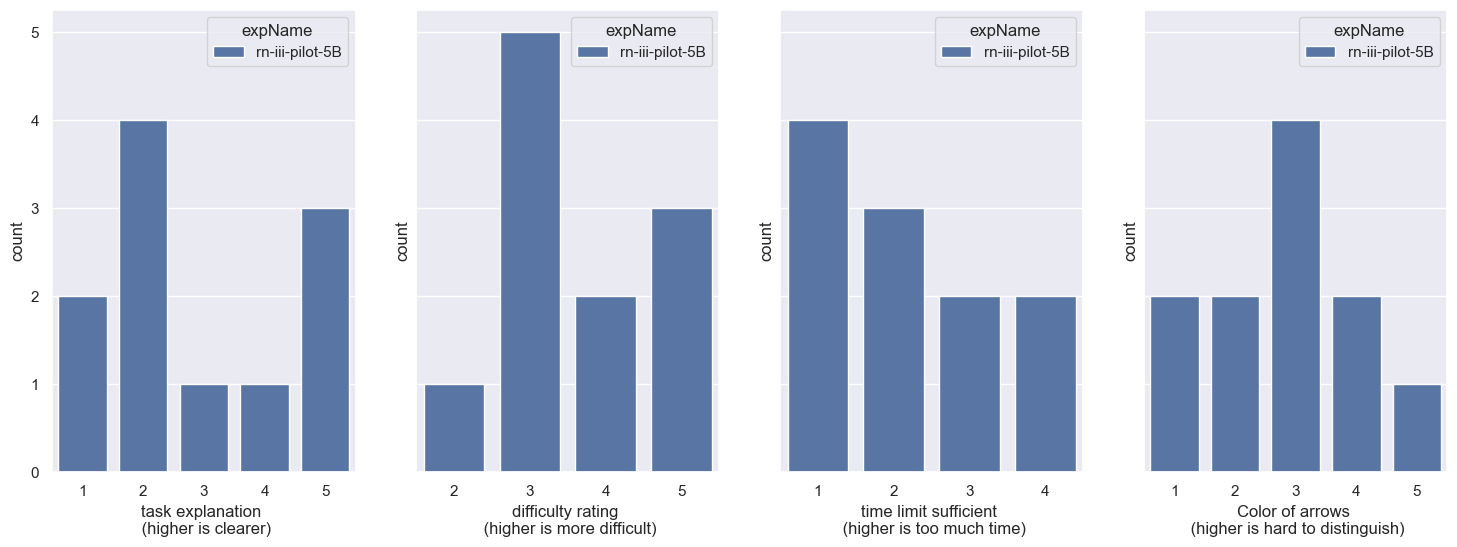

In [10]:
variables = ['task_explanation', 'difficulty_rating', 'time_limit_sufficient', 'arrows_color']
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, len(variables), sharey=True, figsize=(18, 6))

sns.countplot(data=post_survey_df, x="task_explanation", hue="expName", ax=ax1)
ax1.set_xlabel('task explanation \n (higher is clearer)')
sns.countplot(data=post_survey_df, x="difficulty_rating", hue="expName", ax=ax2)
ax2.set_xlabel('difficulty rating \n (higher is more difficult)')
sns.countplot(data=post_survey_df, x="time_limit_sufficient", hue="expName", ax=ax3)
ax3.set_xlabel('time limit sufficient \n (higher is too much time)')
sns.countplot(data=post_survey_df, x="arrows_color", hue="expName", ax=ax4)
ax4.set_xlabel('Color of arrows \n (higher is hard to distinguish)')

if to_save_plots:
    f.savefig(os.path.join(figures_path, 'post_survey.pdf'), format='pdf', dpi=300)
    f.savefig(os.path.join(figures_path, 'post_survey.png'), format='png', dpi=300)

# Scores analysis

## preprocessing

In [66]:
scores_df.replace({"isAI": {True: 'AI', False: 'Human'}}, inplace=True)
scores_df.groupby(by=["expName","trialType","isAI"]).size()

expName          trialType      isAI 
rn-iii-pilot-5b  demonstration  AI       40
                                Human    11
                 individual     AI       40
                                Human    66
                 try_yourself   AI       10
                                Human    88
dtype: int64

In [67]:
scores_df

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score
0,647731a58664fd383a5bfc0f,AI,rn-iii-pilot-5b,0,NaN,try_yourself,NaN,NaN,NaN,NaN,NaN
1,647731a58664fd383a5bfc0f,AI,rn-iii-pilot-5b,0,0.0,individual,494f81180d20e6e3833458bc9e3650a4,950.0,4.0,400.0,950.0
2,647731a58664fd383a5bfc0f,AI,rn-iii-pilot-5b,0,1.0,individual,fd96e4d30861ce81eac2b1500da110fd,1050.0,4.0,300.0,1050.0
3,647731a58664fd383a5bfc0f,AI,rn-iii-pilot-5b,0,2.0,individual,952e931bb61a5b5dacf6562363b91260,1450.0,4.0,600.0,1450.0
4,647731a58664fd383a5bfc0f,AI,rn-iii-pilot-5b,0,3.0,individual,4bab7793667a3302e33d0987aa8d9f8b,1250.0,4.0,800.0,1250.0
...,...,...,...,...,...,...,...,...,...,...,...
250,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,23.0,individual,cb11a92337e321f67485a44764c1d9d7,1250.0,4.0,400.0,1050.0
251,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,24.0,individual,dcf8c0a56a196ab09598672bfe02e0de,1250.0,4.0,0.0,1050.0
252,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,25.0,individual,d97c38c9218b6edd11813f792278572f,1650.0,4.0,300.0,1650.0
253,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,26.0,individual,8bc826881809ecd3ac951da2e6c8d01a,550.0,1.0,800.0,1250.0


In [68]:
scores_df_ai = scores_df[scores_df['isAI']=='AI']
scores_df_human = scores_df[scores_df['isAI']=='Human']

scores_df_human.loc[scores_df_human['trialIdx'].isin([10,13,16,19]), 'trialType'] = 'try_yourself_before'
scores_df_human.loc[scores_df_human['trialIdx'].isin([12,15,18,21]), 'trialType'] = 'try_yourself_after'
scores_df_human.loc[scores_df_human['trialIdx'].isin([4,5]), 'trialType'] = 'individual_before'
scores_df_human.loc[scores_df_human['trialIdx'].isin([23,24,25,26]), 'trialType'] = 'individual_after'

scores_df = pd.concat([scores_df_ai, scores_df_human])

# create plot hue
scores_df['plot_hue'] = scores_df['isAI'].astype(str) + ', ' + scores_df['trialType'].astype(str)
scores_df

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score,plot_hue
0,647731a58664fd383a5bfc0f,AI,rn-iii-pilot-5b,0,NaN,try_yourself,NaN,NaN,NaN,NaN,NaN,"AI, try_yourself"
1,647731a58664fd383a5bfc0f,AI,rn-iii-pilot-5b,0,0.0,individual,494f81180d20e6e3833458bc9e3650a4,950.0,4.0,400.0,950.0,"AI, individual"
2,647731a58664fd383a5bfc0f,AI,rn-iii-pilot-5b,0,1.0,individual,fd96e4d30861ce81eac2b1500da110fd,1050.0,4.0,300.0,1050.0,"AI, individual"
3,647731a58664fd383a5bfc0f,AI,rn-iii-pilot-5b,0,2.0,individual,952e931bb61a5b5dacf6562363b91260,1450.0,4.0,600.0,1450.0,"AI, individual"
4,647731a58664fd383a5bfc0f,AI,rn-iii-pilot-5b,0,3.0,individual,4bab7793667a3302e33d0987aa8d9f8b,1250.0,4.0,800.0,1250.0,"AI, individual"
...,...,...,...,...,...,...,...,...,...,...,...,...
250,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,23.0,individual_after,cb11a92337e321f67485a44764c1d9d7,1250.0,4.0,400.0,1050.0,"Human, individual_after"
251,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,24.0,individual_after,dcf8c0a56a196ab09598672bfe02e0de,1250.0,4.0,0.0,1050.0,"Human, individual_after"
252,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,25.0,individual_after,d97c38c9218b6edd11813f792278572f,1650.0,4.0,300.0,1650.0,"Human, individual_after"
253,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,26.0,individual_after,8bc826881809ecd3ac951da2e6c8d01a,550.0,1.0,800.0,1250.0,"Human, individual_after"


Text(0.5, 0.98, 'RN-III Pilot 5B')

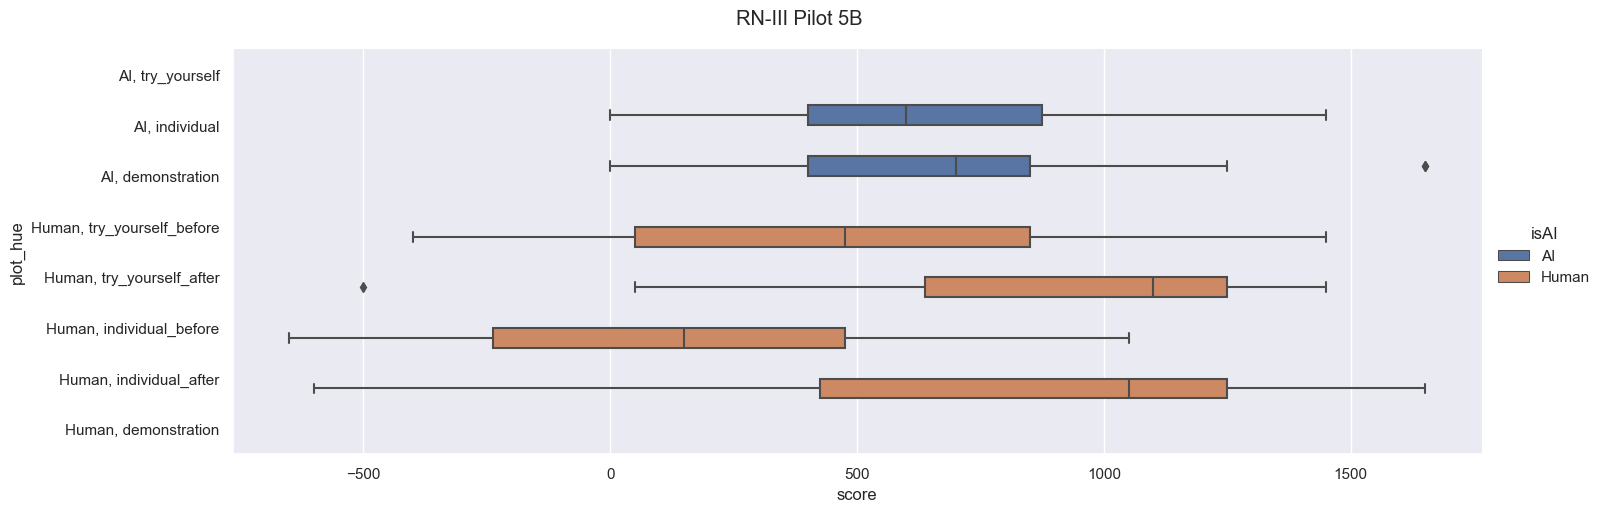

In [18]:
fig1 = sns.catplot(data=scores_df, x="score", y="plot_hue", hue='isAI', kind="box", height=5, aspect=3)
fig1.fig.subplots_adjust(top=0.9)
fig1.fig.suptitle('RN-III Pilot 5B')

In [69]:
import ptitprince as pt

scores_df_detailed = scores_df_human
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([10,13]), 'plot_hue'] = 'try_yourself_before'
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([12,15]), 'plot_hue'] = 'try_yourself_after'
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([16,19]), 'plot_hue'] = 'try_yourself_before'
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([18,21]), 'plot_hue'] = 'try_yourself_after'
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([4,5]), 'plot_hue'] = 'individual_before'
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([23,24,25,26]), 'plot_hue'] = 'individual_after'
#scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([29,30]), 'plot_hue'] = 'demonstration'

scores_df_detailed

/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_9127/2966249011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([10,13]), 'plot_hue'] = 'try_yourself_before'


,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score,plot_hue
90,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,10.0,try_yourself_before,949d93f06b9a159e993467fe9d6eec5a,400.0,1.0,500.0,1150.0,try_yourself_before
91,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,12.0,try_yourself_after,949d93f06b9a159e993467fe9d6eec5a,950.0,4.0,500.0,1150.0,try_yourself_after
92,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,13.0,try_yourself_before,13cca31d179666d20e50d055a4ecefb7,0.0,2.0,400.0,1250.0,try_yourself_before
93,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,15.0,try_yourself_after,13cca31d179666d20e50d055a4ecefb7,1450.0,4.0,400.0,1250.0,try_yourself_after
94,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,16.0,try_yourself_before,05f42eade1468cc6abd87196683cc94b,1050.0,4.0,600.0,1250.0,try_yourself_before
...,...,...,...,...,...,...,...,...,...,...,...,...
250,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,23.0,individual_after,cb11a92337e321f67485a44764c1d9d7,1250.0,4.0,400.0,1050.0,individual_after
251,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,24.0,individual_after,dcf8c0a56a196ab09598672bfe02e0de,1250.0,4.0,0.0,1050.0,individual_after
252,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,25.0,individual_after,d97c38c9218b6edd11813f792278572f,1650.0,4.0,300.0,1650.0,individual_after
253,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,26.0,individual_after,8bc826881809ecd3ac951da2e6c8d01a,550.0,1.0,800.0,1250.0,individual_after


In [42]:
test1 = scores_df_detailed[scores_df_detailed['sessionId'].isin(["647731a58664fd383a5bfc1a"])][['networkId','score']]
test2 = scores_df_detailed[scores_df_detailed['sessionId'].isin(["64773d6f8664fd383a5bfc32"])][['networkId','score']]

In [43]:
test1

,networkId,score
105,f4fc0eed1f99e4ca2f29698f38964616,600.0
106,f4fc0eed1f99e4ca2f29698f38964616,550.0
107,d4f0679d1c1e12e13bd855b7006fd632,0.0
108,d4f0679d1c1e12e13bd855b7006fd632,1250.0
109,d49b5f8c2be2938a2bf9dd537cacce29,1250.0
110,d49b5f8c2be2938a2bf9dd537cacce29,1250.0
111,9b13a46db8052c4c8d30ab008509ecfb,1250.0
112,9b13a46db8052c4c8d30ab008509ecfb,1250.0
113,6193dc93fccbaaeb801297a9198f69e1,500.0
114,5d68c786da3fe4a4d5a0e5168b2496ab,400.0


In [44]:
test2

,networkId,score
240,f4fc0eed1f99e4ca2f29698f38964616,600.0
241,f4fc0eed1f99e4ca2f29698f38964616,550.0
242,d4f0679d1c1e12e13bd855b7006fd632,0.0
243,d4f0679d1c1e12e13bd855b7006fd632,1250.0
244,d49b5f8c2be2938a2bf9dd537cacce29,1250.0
245,d49b5f8c2be2938a2bf9dd537cacce29,1250.0
246,9b13a46db8052c4c8d30ab008509ecfb,1250.0
247,9b13a46db8052c4c8d30ab008509ecfb,1250.0
248,6193dc93fccbaaeb801297a9198f69e1,500.0
249,5d68c786da3fe4a4d5a0e5168b2496ab,400.0


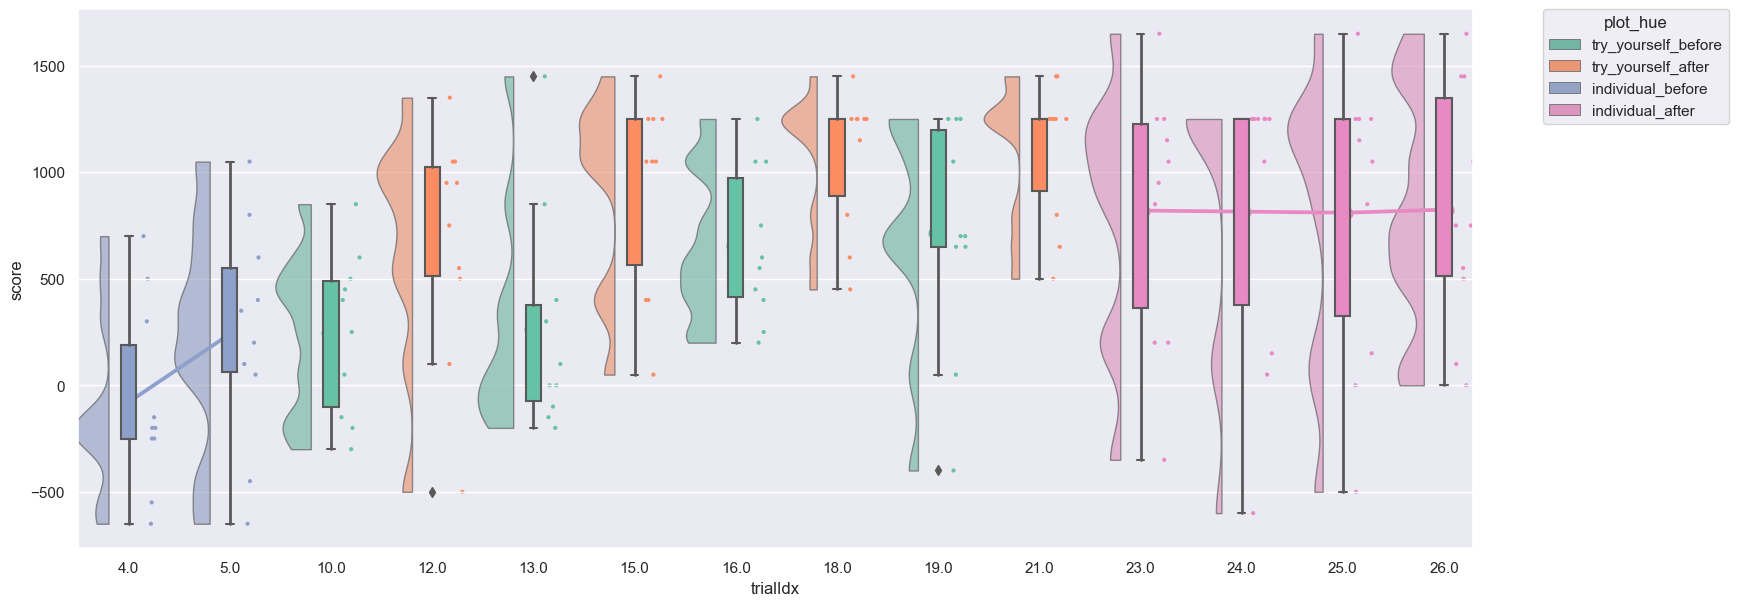

In [46]:
f, ax = plt.subplots(figsize=(18, 7))
pt.RainCloud(x = 'trialIdx',
             y = 'score',
             hue = 'plot_hue',
             data = scores_df_detailed[~scores_df_detailed['sessionId'].isin(["647731a58664fd383a5bfc1a"])],
             palette = "Set2",
             bw = .2,
             width_viol = .7,
             ax=ax,
             orient = 'v' ,
             alpha = .65,
             dodge = False,
             pointplot = True,
             move = .2)

plt.savefig(os.path.join(figures_path, 'raincloud_score_over_trialIdx.png'), format='png', dpi=300)

# Missing steps

In [20]:
moves = pd.read_csv(os.path.join(f"../../data/final/rn-iii-pilot-5b/moves.csv"),sep=',', index_col=0)
trial = pd.read_csv(os.path.join(f"../../data/final/rn-iii-pilot-5b/trial.csv"),sep=',', index_col=0)


human_session_ids = list(scores_df[scores_df['isAI']=='Human']['sessionId'].unique())
moves_human = moves[moves['sessionId'].isin(human_session_ids)]
missings = moves_human.groupby(by=['sessionId','trialID']).agg(n_missings=('isMissing','sum')).reset_index()

print(f"{len(missings[missings['n_missings']>0])} out of {len(missings)} trials "
      f"({round(len(missings[missings['n_missings']>0]) / len(missings) *100,2)} %) have missing steps")

24 out of 154 trials (15.58 %) have missing steps


In [21]:
missings[missings['n_missings']>0]['n_missings'].value_counts(normalize=True)

1    0.250000
3    0.250000
2    0.208333
5    0.125000
4    0.083333
7    0.041667
6    0.041667
Name: n_missings, dtype: float64

In [22]:
missings.groupby(by=['sessionId']).apply(lambda x: len(x[x['n_missings']>0]))

sessionId
647731a58664fd383a5bfc19    2
647731a58664fd383a5bfc1a    2
647731a58664fd383a5bfc1b    4
647731a58664fd383a5bfc1c    0
647731a58664fd383a5bfc1d    3
647731a58664fd383a5bfc1e    2
647731a58664fd383a5bfc1f    5
647731a58664fd383a5bfc20    3
647731a58664fd383a5bfc22    0
647731a58664fd383a5bfc23    1
64773d6f8664fd383a5bfc32    2
dtype: int64

In [47]:
moves

,sessionId,trialID,networkId,sourceLevel,targetLevel,reward,step,isMissing,matchesMyopic,matchesAI
0,647731a58664fd383a5bfc0f,0,494f81180d20e6e3833458bc9e3650a4,0,0,100,1,False,True,True
1,647731a58664fd383a5bfc0f,0,494f81180d20e6e3833458bc9e3650a4,0,1,-50,2,False,False,True
2,647731a58664fd383a5bfc0f,0,494f81180d20e6e3833458bc9e3650a4,1,2,-50,3,False,False,True
3,647731a58664fd383a5bfc0f,0,494f81180d20e6e3833458bc9e3650a4,2,3,-50,4,False,False,True
4,647731a58664fd383a5bfc0f,0,494f81180d20e6e3833458bc9e3650a4,3,4,200,5,False,False,True
...,...,...,...,...,...,...,...,...,...,...
1867,64773d6f8664fd383a5bfc32,26,8bc826881809ecd3ac951da2e6c8d01a,0,0,100,4,False,True,False
1868,64773d6f8664fd383a5bfc32,26,8bc826881809ecd3ac951da2e6c8d01a,0,0,100,5,False,True,False
1869,64773d6f8664fd383a5bfc32,26,8bc826881809ecd3ac951da2e6c8d01a,0,0,100,6,False,True,False
1870,64773d6f8664fd383a5bfc32,26,8bc826881809ecd3ac951da2e6c8d01a,0,0,100,7,False,True,False


In [48]:
moves[moves['sessionId']=='647731a58664fd383a5bfc19']

,sessionId,trialID,networkId,sourceLevel,targetLevel,reward,step,isMissing,matchesMyopic,matchesAI
640,647731a58664fd383a5bfc19,4,cf1b5d875744aee7aff66b414e956861,0,0,0,1,False,True,False
641,647731a58664fd383a5bfc19,4,cf1b5d875744aee7aff66b414e956861,0,0,100,2,False,True,False
642,647731a58664fd383a5bfc19,4,cf1b5d875744aee7aff66b414e956861,0,0,100,3,False,True,False
643,647731a58664fd383a5bfc19,4,cf1b5d875744aee7aff66b414e956861,0,0,100,4,False,True,False
644,647731a58664fd383a5bfc19,4,cf1b5d875744aee7aff66b414e956861,0,0,100,5,False,True,False
...,...,...,...,...,...,...,...,...,...,...
747,647731a58664fd383a5bfc19,26,6f44ff43e3ce41f81cb56990fb5d7129,1,2,-50,4,False,False,False
748,647731a58664fd383a5bfc19,26,6f44ff43e3ce41f81cb56990fb5d7129,2,3,-50,5,False,False,False
749,647731a58664fd383a5bfc19,26,6f44ff43e3ce41f81cb56990fb5d7129,3,4,200,6,False,False,False
750,647731a58664fd383a5bfc19,26,6f44ff43e3ce41f81cb56990fb5d7129,4,3,400,7,False,False,False


In [50]:
score_updated = moves.groupby(by=['sessionId','trialID']).agg(score_true=("reward",'sum')).reset_index()
score_updated

,sessionId,trialID,score_true
0,647731a58664fd383a5bfc0f,0,950
1,647731a58664fd383a5bfc0f,1,1050
2,647731a58664fd383a5bfc0f,2,1450
3,647731a58664fd383a5bfc0f,3,1250
4,647731a58664fd383a5bfc0f,4,650
...,...,...,...
229,64773d6f8664fd383a5bfc32,21,1250
230,64773d6f8664fd383a5bfc32,23,1250
231,64773d6f8664fd383a5bfc32,24,1250
232,64773d6f8664fd383a5bfc32,25,1650


In [53]:
score_updated.loc[score_updated['trialID'].isin([10,13]), 'plot_hue'] = 'try_yourself_before'
score_updated.loc[score_updated['trialID'].isin([12,15]), 'plot_hue'] = 'try_yourself_after'
score_updated.loc[score_updated['trialID'].isin([16,19]), 'plot_hue'] = 'try_yourself_before'
score_updated.loc[score_updated['trialID'].isin([18,21]), 'plot_hue'] = 'try_yourself_after'
score_updated.loc[score_updated['trialID'].isin([4,5]), 'plot_hue'] = 'individual_before'
score_updated.loc[score_updated['trialID'].isin([23,24,25,26]), 'plot_hue'] = 'individual_after'

score_updated

,sessionId,trialID,score_true,plot_hue
0,647731a58664fd383a5bfc0f,0,950,NaN
1,647731a58664fd383a5bfc0f,1,1050,NaN
2,647731a58664fd383a5bfc0f,2,1450,NaN
3,647731a58664fd383a5bfc0f,3,1250,NaN
4,647731a58664fd383a5bfc0f,4,650,individual_before
...,...,...,...,...
229,64773d6f8664fd383a5bfc32,21,1250,try_yourself_after
230,64773d6f8664fd383a5bfc32,23,1250,individual_after
231,64773d6f8664fd383a5bfc32,24,1250,individual_after
232,64773d6f8664fd383a5bfc32,25,1650,individual_after


In [56]:
list(scores_df_ai.sessionId.unique())

['647731a58664fd383a5bfc0f',
 '647731a58664fd383a5bfc10',
 '647731a58664fd383a5bfc11',
 '647731a58664fd383a5bfc12',
 '647731a58664fd383a5bfc13',
 '647731a58664fd383a5bfc14',
 '647731a58664fd383a5bfc15',
 '647731a58664fd383a5bfc16',
 '647731a58664fd383a5bfc17',
 '647731a58664fd383a5bfc18']

<AxesSubplot: xlabel='trialID', ylabel='score_true'>

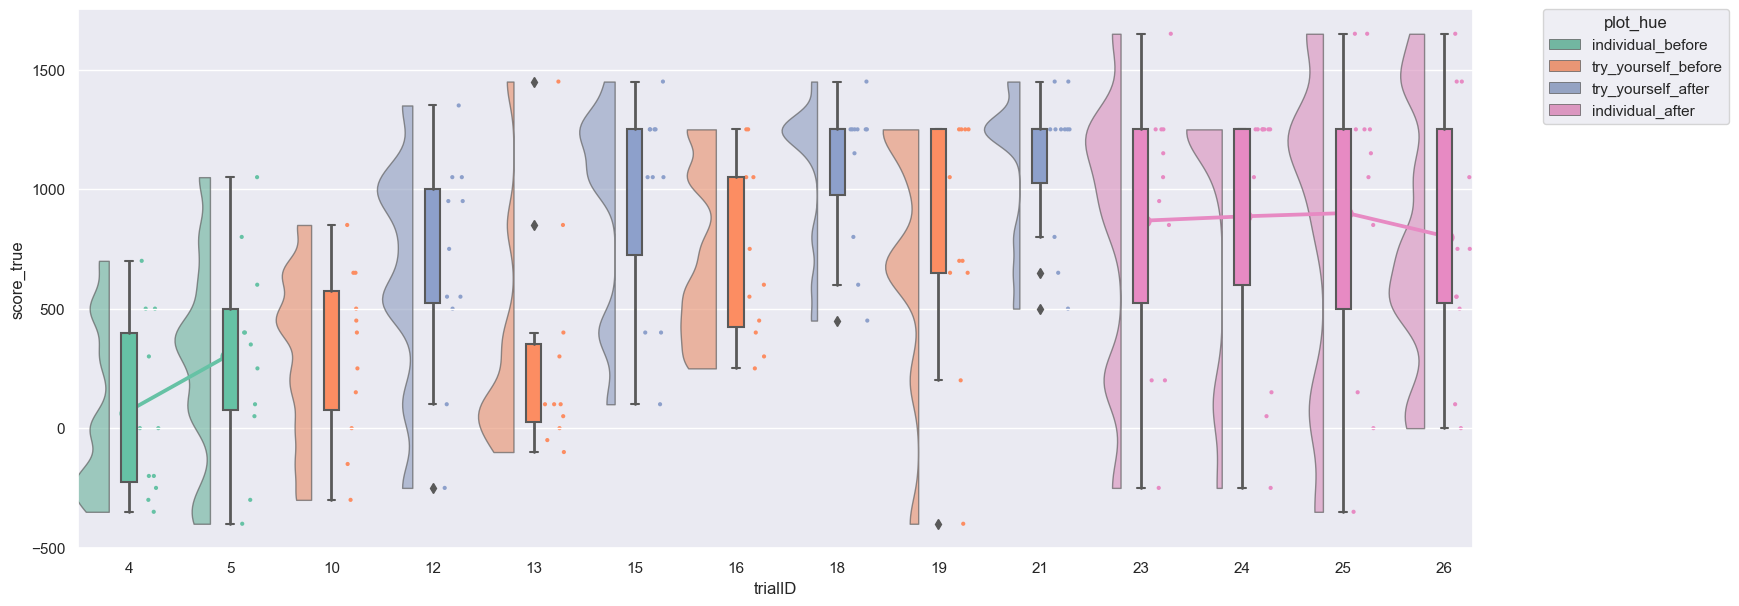

In [58]:
f, ax = plt.subplots(figsize=(18, 7))
pt.RainCloud(x = 'trialID',
             y = 'score_true',
             hue = 'plot_hue',
             data = score_updated[~score_updated['sessionId'].isin(list(scores_df_ai.sessionId.unique()))],
             palette = "Set2",
             bw = .2,
             width_viol = .7,
             ax=ax,
             orient = 'v' ,
             alpha = .65,
             dodge = False,
             pointplot = True,
             move = .2)

plt.savefig(os.path.join(figures_path, 'raincloud_score_over_trialIdx.png'), format='png', dpi=300)

In [70]:
scores_df_detailed = scores_df_detailed[~pd.isna(scores_df_detailed['trialIdx'])]
scores_df_detailed

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score,plot_hue
90,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,10.0,try_yourself_before,949d93f06b9a159e993467fe9d6eec5a,400.0,1.0,500.0,1150.0,try_yourself_before
91,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,12.0,try_yourself_after,949d93f06b9a159e993467fe9d6eec5a,950.0,4.0,500.0,1150.0,try_yourself_after
92,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,13.0,try_yourself_before,13cca31d179666d20e50d055a4ecefb7,0.0,2.0,400.0,1250.0,try_yourself_before
93,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,15.0,try_yourself_after,13cca31d179666d20e50d055a4ecefb7,1450.0,4.0,400.0,1250.0,try_yourself_after
94,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,16.0,try_yourself_before,05f42eade1468cc6abd87196683cc94b,1050.0,4.0,600.0,1250.0,try_yourself_before
...,...,...,...,...,...,...,...,...,...,...,...,...
249,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,5.0,individual_before,5d68c786da3fe4a4d5a0e5168b2496ab,400.0,1.0,600.0,1050.0,individual_before
250,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,23.0,individual_after,cb11a92337e321f67485a44764c1d9d7,1250.0,4.0,400.0,1050.0,individual_after
251,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,24.0,individual_after,dcf8c0a56a196ab09598672bfe02e0de,1250.0,4.0,0.0,1050.0,individual_after
252,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,25.0,individual_after,d97c38c9218b6edd11813f792278572f,1650.0,4.0,300.0,1650.0,individual_after


/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_9127/3041381484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df_detailed['plot_hue2'] = scores_df_detailed['trialIdx'].astype(int).astype(str) + '_' + scores_df_detailed['plot_hue']
/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_9127/3041381484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df_detailed['plot_hue2'] = pd.Categorical(scores_df_detailed['plot_hue2'], [ '4_individual_before',
/var/folders/bf/1wzkxhv

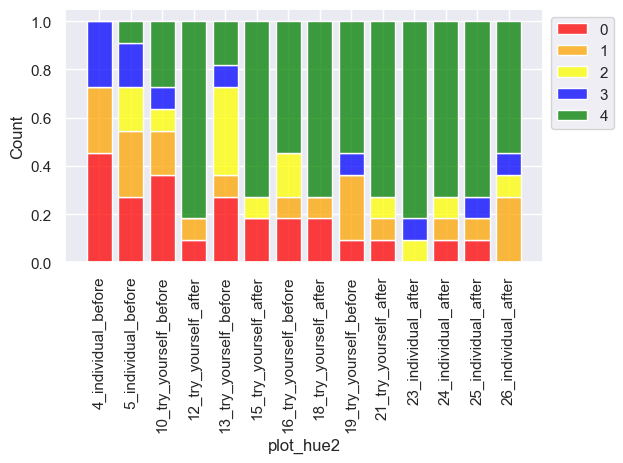

In [78]:
# max level reached plots

scores_df_detailed['plot_hue2'] = scores_df_detailed['trialIdx'].astype(int).astype(str) + '_' + scores_df_detailed['plot_hue']

scores_df_detailed['plot_hue2'] = pd.Categorical(scores_df_detailed['plot_hue2'], [ '4_individual_before',
 '5_individual_before','10_try_yourself_before',
 '12_try_yourself_after',
 '13_try_yourself_before',
 '15_try_yourself_after',
 '16_try_yourself_before',
 '18_try_yourself_after',
 '19_try_yourself_before',
 '21_try_yourself_after',
 '23_individual_after',
 '24_individual_after',
 '25_individual_after',
 '26_individual_after'])

a = scores_df_detailed.groupby(by=['plot_hue2'])['maxLevelReached'].value_counts(normalize=True).to_frame('prop').reset_index()
#plot_order = a.sort_values(by=['trialIdx'], ascending=False).plot_hue.values
g = sns.histplot(a, x='plot_hue2', hue='maxLevelReached',weights='prop',multiple='stack', hue_order=[4,3,2,1,0],
                 palette={0:'red',
                           1:'orange',
                           2:'yellow',
                           3:'blue',
                           4:'green'}, shrink=0.8,
                 legend=True)
plt.legend({0:'red',
                           1:'orange',
                           2:'yellow',
                           3:'blue',
                           4:'green'},bbox_to_anchor=(1, 1))
#g.set_xticks(range(len(df))) # <--- set the ticks first
g.set_xticklabels([ '4_individual_before',
 '5_individual_before','10_try_yourself_before',
 '12_try_yourself_after',
 '13_try_yourself_before',
 '15_try_yourself_after',
 '16_try_yourself_before',
 '18_try_yourself_after',
 '19_try_yourself_before',
 '21_try_yourself_after',
 '23_individual_after',
 '24_individual_after',
 '25_individual_after',
 '26_individual_after'],rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'LevelReached_by_trialType.png'), format='png', dpi=300)

In [62]:
scores_df_detailed

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score,plot_hue
90,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,10.0,try_yourself_before,949d93f06b9a159e993467fe9d6eec5a,400.0,1.0,500.0,1150.0,try_yourself_before
91,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,12.0,try_yourself_after,949d93f06b9a159e993467fe9d6eec5a,950.0,4.0,500.0,1150.0,try_yourself_after
92,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,13.0,try_yourself_before,13cca31d179666d20e50d055a4ecefb7,0.0,2.0,400.0,1250.0,try_yourself_before
93,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,15.0,try_yourself_after,13cca31d179666d20e50d055a4ecefb7,1450.0,4.0,400.0,1250.0,try_yourself_after
94,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,16.0,try_yourself_before,05f42eade1468cc6abd87196683cc94b,1050.0,4.0,600.0,1250.0,try_yourself_before
...,...,...,...,...,...,...,...,...,...,...,...,...
250,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,23.0,individual_after,cb11a92337e321f67485a44764c1d9d7,1250.0,4.0,400.0,1050.0,individual_after
251,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,24.0,individual_after,dcf8c0a56a196ab09598672bfe02e0de,1250.0,4.0,0.0,1050.0,individual_after
252,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,25.0,individual_after,d97c38c9218b6edd11813f792278572f,1650.0,4.0,300.0,1650.0,individual_after
253,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,26.0,individual_after,8bc826881809ecd3ac951da2e6c8d01a,550.0,1.0,800.0,1250.0,individual_after
